# Pre-Processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X = df[['LSTAT']].values
y = boston_data.target

# Without Pre-Processing

In [6]:
alpha = 0.0001
w_ = np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X, w_[1:]) + w_[0]
    errors = (y - y_pred)
    
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

Text(0.5, 0, 'Epoch')

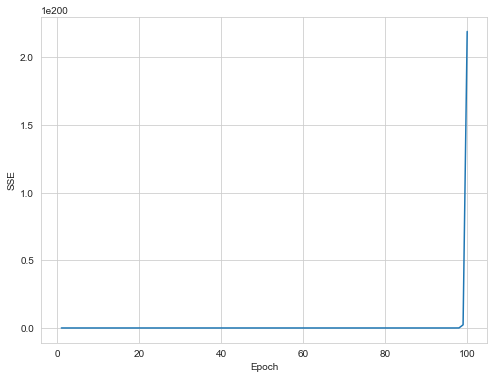

In [7]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')

# With Pre-Processing

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [9]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

Text(0.5, 0, 'Epoch')

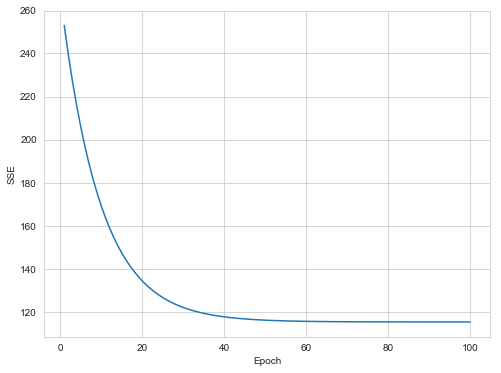

In [10]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')

***

(-40, 40)

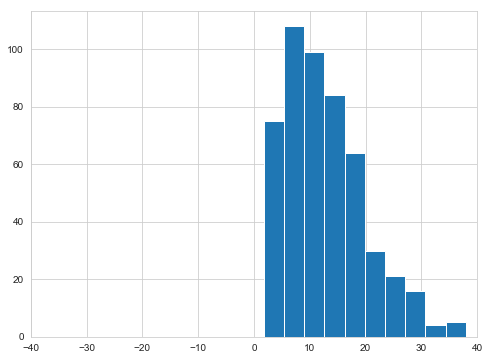

In [11]:
plt.figure(figsize=(8,6))
plt.hist(X)
plt.xlim(-40, 40)

(-4, 4)

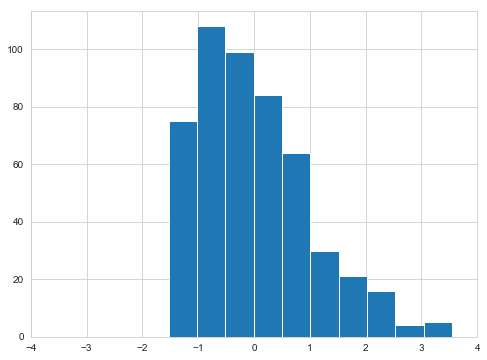

In [12]:
plt.figure(figsize=(8,6))
plt.hist(X_std)
plt.xlim(-4, 4)

***

# Data Pre-Processing

In [13]:
from sklearn import preprocessing

In [41]:
X_train = np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1.]])

# Standardization / Mean Removal / Variance Scaling

In [42]:
X_scaled = preprocessing.scale(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [43]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [44]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [45]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [47]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [48]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

([array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
  array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1.])],
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 3 Lists of Patches objects>)

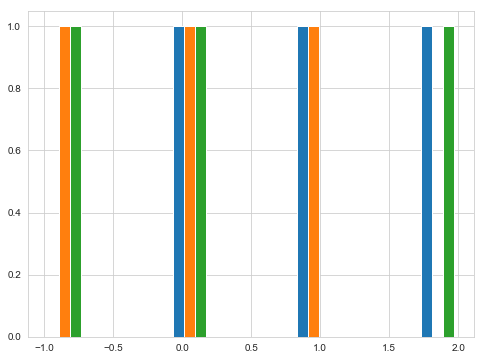

In [49]:
plt.figure(figsize=(8,6))
plt.hist(X_train)

In [50]:
X_test = [[-1., 1., 0.]]

In [51]:
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

# Min-Max or Scaling Features to a Range

## MinMaxScaler

In [69]:
X_train = np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1.]])

In [70]:
min_max_scaler = preprocessing.MinMaxScaler()

In [71]:
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [72]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [73]:
X_test = np.array([[-3., -1., 4.]])

In [74]:
X_test_minmax = min_max_scaler.transform(X_test)

In [75]:
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [76]:
preprocessing.MinMaxScaler?

# MaxAbsScaler

In [77]:
X_train = np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1.]])

In [80]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [81]:
X_test = np.array([[-3., -1., 4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

# Normalization

There are 2 types of Normalization

1. L1 normalization, Least Absolute Deviations Ensure the sum of absolute values is 1 in each row
2. L2 normalization, Least squares, Ensure that the sum of squares is 1

In [86]:
X = [[1., -1., 2.],
    [2., 0., 0.],
    [0., 1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [87]:
normalizer = preprocessing.Normalizer().fit(X)
normalizer

Normalizer(copy=True, norm='l2')

In [88]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [89]:
normalizer.transform([[-1., 1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

# Binarization

In [91]:
X = [[1., -1., 2.],
    [2., 0., 0.],
    [0., 1., -1.]]
binarizer = preprocessing.Binarizer().fit(X)
binarizer

Binarizer(copy=True, threshold=0.0)

In [92]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [95]:
binarizer = preprocessing.Binarizer(threshold=1.1)

In [96]:
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

# Encoding Categorical Features

In [98]:
source = ['australia', 'singapore', 'new zealand', 'hong kong']

In [99]:
label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)

In [100]:
print("country to code mapping:\n")
for k, v in enumerate(label_enc.classes_):
    print(v, '\t', k)

country to code mapping:

australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3


In [101]:
test_data = ['hong kong', 'singapore', 'australia', 'new zealand']

In [103]:
result = label_enc.transform(test_data)
print(result)

[1 3 0 2]


# One Hot / One-of-K Encoding

In [104]:
source

['australia', 'singapore', 'new zealand', 'hong kong']

In [105]:
src

array([0, 3, 2, 1], dtype=int64)

In [106]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [121]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[0, :])])
print(invert_res)

['australia']


In [122]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[3, :])])
print(invert_res)

['hong kong']
